# EXPLORATORY DATA ANALYSIS (EDA) - OVERVIEW & PANDAS FUNCTIONS

EDA is a critical step in the data science process that helps us understand our dataset 
before applying machine learning algorithms or statistical models.

KEY OBJECTIVES OF EDA:
1. Understand the structure and characteristics of the data
2. Identify missing values, outliers, and data quality issues
3. Discover patterns, trends, and relationships in the data
4. Generate hypotheses for further analysis
5. Inform data preprocessing and feature engineering decisions

ESSENTIAL PANDAS FUNCTIONS FOR EDA:

1. DATA OVERVIEW:
    - df.head() / df.head(n)     → View first n rows (default 5)
    - df.tail() / df.tail(n)     → View last n rows (default 5)
    - df.sample(n)               → View n random rows
    - df.shape                   → Get dimensions (rows, columns)
    - df.columns                 → List all column names
    - df.info()                  → Data types, memory usage, non-null counts
    - df.dtypes                  → Data types of each column

2. STATISTICAL SUMMARY:
    - df.describe()              → Summary statistics for numerical columns
    - df.describe(include='all') → Summary statistics for all columns
    - df.nunique()               → Count unique values per column
    - df.value_counts()          → Frequency count of unique values

3. DATA QUALITY ASSESSMENT:
    - df.isnull().sum()          → Count missing values per column
    - df.isna().sum()            → Alternative to isnull()
    - df.duplicated().sum()      → Count duplicate rows
    - df.drop_duplicates()       → Remove duplicate rows

4. DATA EXPLORATION:
    - df.groupby().agg()         → Group data and apply aggregations
    - df.corr()                  → Correlation matrix for numerical columns
    - df.crosstab()              → Cross-tabulation for categorical variables
    - df.pivot_table()           → Create pivot tables

5. DATA VISUALIZATION (with pandas plotting):
    - df.plot()                  → Basic line plot
    - df.hist()                  → Histograms for all numerical columns
    - df.boxplot()               → Box plots for outlier detection
    - df.plot.scatter()          → Scatter plots for relationships

CURRENT DATASET INSIGHTS:
- Dataset contains 525 rows and 18 columns
- Multiple data types: numerical (Age, Purchase Amount, etc.) and categorical (Gender, Category, etc.)
- Significant missing values across most columns (ranging from 8-48 missing values per column)
- Mixed case inconsistencies in Gender column ('Male', 'female', 'Female')
- Some critical columns like Customer ID have missing values (39 missing)
"""

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df: pd.DataFrame = pd.read_csv('customer_purchase_dataset.csv')

In [2]:
# View first 5 rows
df.head()

,Customer ID,Age,Annual Income (USD),Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,CUST0001,56.0,37449.15,Male,Dress,Clothing,57.64,Chicago,XL,Yellow,Fall,5.0,Yes,Standard,Yes,Yes,7.0,Credit Card,Monthly
1,CUST0002,46.0,86202.12,Female,Shoes,Footwear,57.69,Houston,XL,Blue,Spring,5.0,No,Express,No,Yes,12.0,Credit Card,Fortnightly
2,CUST0003,32.0,58895.84,Female,Shoes,Footwear,178.59,Miami,XL,White,Summer,4.0,No,Standard,Yes,Yes,7.0,Credit Card,Weekly
3,CUST0004,60.0,51913.67,Male,NaN,Clothing,170.97,Houston,L,White,Summer,4.0,Yes,Express,No,No,11.0,Credit Card,Monthly
4,CUST0005,25.0,64578.89,male,Bag,Accessories,393.08,Miami,S,Black,Fall,5.0,No,Express,Yes,Yes,6.0,Credit Card,Weekly


In [3]:
# View random 5 rows
df.sample(5)

,Customer ID,Age,Annual Income (USD),Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
290,CUST0291,57.0,75341.01,Female,Dress,Clothing,224.63,Miami,S,White,Fall,5.0,No,NaN,No,No,13.0,Credit Card,Fortnightly
1034,CUST0581,29.0,64191.61,Female,Pants,Clothing,74.29,Los Angeles,L,Black,Winter,5.0,No,Express,No,Yes,6.0,PayPal,Fortnightly
344,CUST0345,45.0,80576.32,Female,Jacket,Clothing,291.18,New York,L,Black,Winter,5.0,Yes,Express,Yes,No,11.0,Credit Card,Weekly
876,CUST0877,62.0,93714.08,Female,Shirt,Clothing,120.03,Miami,L,Red,Fall,5.0,Yes,Standard,No,No,16.0,PayPal,Weekly
836,CUST0837,30.0,56793.71,Male,Dress,Clothing,97.37,Miami,M,Green,Fall,5.0,No,Standard,No,No,2.0,Credit Card,Monthly


In [4]:
# View last 5 rows
df.tail(5) 

,Customer ID,Age,Annual Income (USD),Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
1045,CUST0471,31.0,81965.30,Male,Jacket,Clothing,435.69,Miami,S,White,Winter,Five,Yes,Same-Day,No,Yes,6.0,PayPal,Fortnightly
1046,CUST0981,45.0,102409.69,Female,Shoes,Footwear,249.36,Houston,M,Blue,Fall,5.0,No,Standard,Yes,Yes,8.0,Debit Card,Weekly
1047,CUST0801,32.0,40909.97,Male,Jacket,Clothing,74.54,Los Angeles,S,Yellow,Spring,5.0,Yes,Same-Day,Yes,No,1.0,Debit Card,Weekly
1048,CUST0689,31.0,50575.75,female,Shoes,Footwear,47.16,Houston,L,Black,Winter,5.0,Yes,Express,No,Yes,2.0,Debit Card,Monthly
1049,CUST0314,25.0,51790.17,Male,Shoes,Footwear,254.90,Miami,S,Green,Spring,4.0,No,Same-Day,No,No,1.0,Apple Pay,Fortnightly


In [5]:
# Row and column count
df.shape

(1050, 19)

In [6]:
# Show columns
df.columns

Index(['Customer ID', 'Age', 'Annual Income (USD)', 'Gender', 'Item Purchased',
       'Category', 'Purchase Amount (USD)', 'Location', 'Size', 'Color',
       'Season', 'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [7]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             1036 non-null   object 
 1   Age                     1035 non-null   float64
 2   Annual Income (USD)     1044 non-null   float64
 3   Gender                  1046 non-null   object 
 4   Item Purchased          1032 non-null   object 
 5   Category                1037 non-null   object 
 6   Purchase Amount (USD)   1046 non-null   float64
 7   Location                1044 non-null   object 
 8   Size                    1048 non-null   object 
 9   Color                   1034 non-null   object 
 10  Season                  1037 non-null   object 
 11  Review Rating           1039 non-null   object 
 12  Subscription Status     1033 non-null   object 
 13  Shipping Type           1034 non-null   object 
 14  Discount Applied        1033 non-null   

In [8]:
# Summary statistics
df.describe()
# df.describe(include='all')

# include = 'all' to include categorical columns as well otherwise only numerical columns are considered

,Age,Annual Income (USD),Purchase Amount (USD),Previous Purchases
count,1035.000000,1044.000000,1046.000000,1029.000000
mean,41.633816,67879.510776,170.868996,7.527697
std,13.781600,25094.918124,161.783229,4.108980
min,18.000000,20000.000000,-491.500000,0.000000
25%,30.000000,50126.332500,68.490000,4.000000
50%,42.000000,67287.690000,131.190000,8.000000
75%,53.000000,84149.520000,228.957500,11.000000
max,65.000000,149492.730000,994.920000,17.000000


In [9]:
# Checking for null values
df.isnull().sum()

Customer ID               14
Age                       15
Annual Income (USD)        6
Gender                     4
Item Purchased            18
Category                  13
Purchase Amount (USD)      4
Location                   6
Size                       2
Color                     16
Season                    13
Review Rating             11
Subscription Status       17
Shipping Type             16
Discount Applied          17
Promo Code Used            8
Previous Purchases        21
Payment Method             5
Frequency of Purchases     4
dtype: int64

In [10]:
# Checking for duplicate rows
df.duplicated().sum()

np.int64(50)

# Data Cleaning

In [11]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
# Remove all records with any column having null values
df.dropna(inplace=True)
df.isnull().sum()
df.shape

(839, 19)

In [14]:
# Categorical Data Analysis
for col in df.select_dtypes(include='object').columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("\n")

Column: Customer ID
Customer ID
CUST0001    1
CUST0002    1
CUST0003    1
CUST0005    1
CUST0006    1
           ..
CUST0994    1
CUST0995    1
CUST0996    1
CUST0998    1
CUST1000    1
Name: count, Length: 839, dtype: int64


Column: Gender
Gender
Male      416
Female    396
male       14
female     13
Name: count, dtype: int64


Column: Item Purchased
Item Purchased
Pants     175
Dress     166
Shirt     166
Jacket    139
Shoes     115
Bag        78
Name: count, dtype: int64


Column: Category
Category
Clothing       635
Footwear       112
Accessories     77
Unknown         15
Name: count, dtype: int64


Column: Location
Location
Los Angeles      194
Miami            173
New York         167
Houston          151
Chicago          130
New York           9
Los Angeles        6
Miami              4
Chicago            3
Houston            2
Name: count, dtype: int64


Column: Size
Size
S     225
M     215
L     210
XL    189
Name: count, dtype: int64


Column: Color
Color
Blue      155
Yel

In [15]:
# Ensure same casing for all categorical columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.title()
    # print(df[col].value_counts())

In [16]:
# Strip leading/trailing spaces
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()
    # print(df[col].value_counts())

In [17]:
# Remove typo in Yess for Yes in 'Subscription Status' column
df['Subscription Status'] = df['Subscription Status'].replace("Yess", "Yes")
df['Subscription Status'].value_counts()

Subscription Status
Yes    423
No     416
Name: count, dtype: int64

In [18]:
df['Review Rating'].dtype

dtype('O')

In [19]:
df['Review Rating'] = df['Review Rating'].replace("Five", 5)

# Convert to float
df['Review Rating'] = pd.to_numeric(df['Review Rating'], errors='coerce')
df['Review Rating'].dtype

dtype('float64')

In [20]:
df['Purchase Amount (USD)'].describe()

count    839.000000
mean     169.483826
std      163.737749
min     -491.500000
25%       68.935000
50%      130.430000
75%      228.205000
max      994.920000
Name: Purchase Amount (USD), dtype: float64

In [21]:
# Remove purchase amounts with negative values
df = df[df['Purchase Amount (USD)'] >= 0]
df['Purchase Amount (USD)'].describe()

count    823.000000
mean     178.156440
std      152.122377
min       15.000000
25%       71.765000
50%      133.460000
75%      233.825000
max      994.920000
Name: Purchase Amount (USD), dtype: float64

In [22]:
# Store cleaned dataset back to .csv file
df.to_csv('customer_purchase_dataset_cleaned.csv', index=False)

# Descriptive statistics after cleaning

In [23]:
# Measures of Central Tendency
mean_purchase = df.select_dtypes(include=['float64', 'int64']).mean()
median_purchase = df.select_dtypes(include=['float64', 'int64']).median()
mode_purchase = df.select_dtypes(include=['float64', 'int64']).mode().iloc[0]

print(f"Mean: {mean_purchase}")
print(f"Median: {median_purchase}")
print(f"Mode: {mode_purchase}")

Mean: Age                         41.603888
Annual Income (USD)      68204.110510
Purchase Amount (USD)      178.156440
Review Rating                4.688943
Previous Purchases           7.566221
dtype: float64
Median: Age                         42.00
Annual Income (USD)      67587.71
Purchase Amount (USD)      133.46
Review Rating                5.00
Previous Purchases           8.00
dtype: float64
Mode: Age                         43.00
Annual Income (USD)      20000.00
Purchase Amount (USD)       18.92
Review Rating                5.00
Previous Purchases           9.00
Name: 0, dtype: float64


In [24]:
# Measures of spread

std_dev = df.select_dtypes(include=['float64', 'int64']).std()
variance = df.select_dtypes(include=['float64', 'int64']).var()
range_v = df.select_dtypes(include=['float64', 'int64']).max() - df.select_dtypes(include=['float64', 'int64']).min()
Q1 = df.select_dtypes(include=['float64', 'int64']).quantile(0.25)
Q3 = df.select_dtypes(include=['float64', 'int64']).quantile(0.75)
IQR = Q3 - Q1

print(f"Standard Deviation: {std_dev}")
print(f"Variance: {variance}")
print(f"Range: {range_v}")
print(f"IQR: {IQR}")

Standard Deviation: Age                         13.849068
Annual Income (USD)      25099.557242
Purchase Amount (USD)      152.122377
Review Rating                0.468431
Previous Purchases           4.120765
dtype: float64
Variance: Age                      1.917967e+02
Annual Income (USD)      6.299878e+08
Purchase Amount (USD)    2.314122e+04
Review Rating            2.194275e-01
Previous Purchases       1.698071e+01
dtype: float64
Range: Age                          47.00
Annual Income (USD)      129492.73
Purchase Amount (USD)       979.92
Review Rating                 2.00
Previous Purchases           17.00
dtype: float64
IQR: Age                         23.50
Annual Income (USD)      34262.75
Purchase Amount (USD)      162.06
Review Rating                1.00
Previous Purchases           7.00
dtype: float64


## Data Visualization and Plotting

Data visualization is a crucial component of exploratory data analysis that helps us understand patterns, distributions, and relationships in our dataset through graphical representations.

### Why Plotting is Important in EDA:
1. **Pattern Recognition**: Visual patterns are easier to identify than numerical summaries
2. **Outlier Detection**: Extreme values stand out clearly in plots
3. **Distribution Understanding**: Shape, skewness, and spread become apparent
4. **Relationship Discovery**: Correlations and associations between variables
5. **Data Quality Assessment**: Missing values and inconsistencies are visible

### Common Plot Types for Different Data Types:

**Numerical Data:**
- **Histograms**: Show distribution shape and frequency
- **Box Plots**: Display quartiles, median, and outliers
- **Density Plots (KDE)**: Smooth distribution curves
- **Scatter Plots**: Relationships between two numerical variables
- **Line Plots**: Time series or ordered data trends

**Categorical Data:**
- **Bar Charts**: Frequency of categories
- **Pie Charts**: Proportions of categories
- **Count Plots**: Similar to bar charts with seaborn

**Mixed Data Types:**
- **Violin Plots**: Combine box plots with density plots
- **Heatmaps**: Correlation matrices or cross-tabulations
- **Pair Plots**: Multiple scatter plots for all variable combinations

### Key Plotting Libraries:
- **Matplotlib**: Foundation plotting library with fine control
- **Seaborn**: Statistical plotting with attractive defaults
- **Pandas Plotting**: Quick plots directly from DataFrames
- **Plotly**: Interactive visualizations

### Statistical Information in Plots:
Our current dataset analysis shows:
- **Mean vs Median**: Close values suggest relatively normal distributions
- **Skewness**: Most variables show slight right-skew (positive values)
- **IQR**: Interquartile ranges help identify outliers in box plots
- **Standard Deviation**: Indicates spread around the mean

The following cells will demonstrate various plotting techniques to visualize our customer purchase dataset effectively.

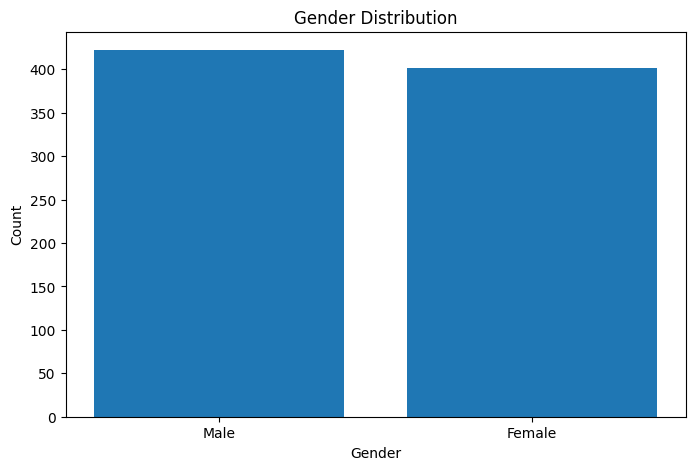

In [25]:
# Simple bar chart for Gender column
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
plt.bar(df['Gender'].value_counts().index, df['Gender'].value_counts().values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


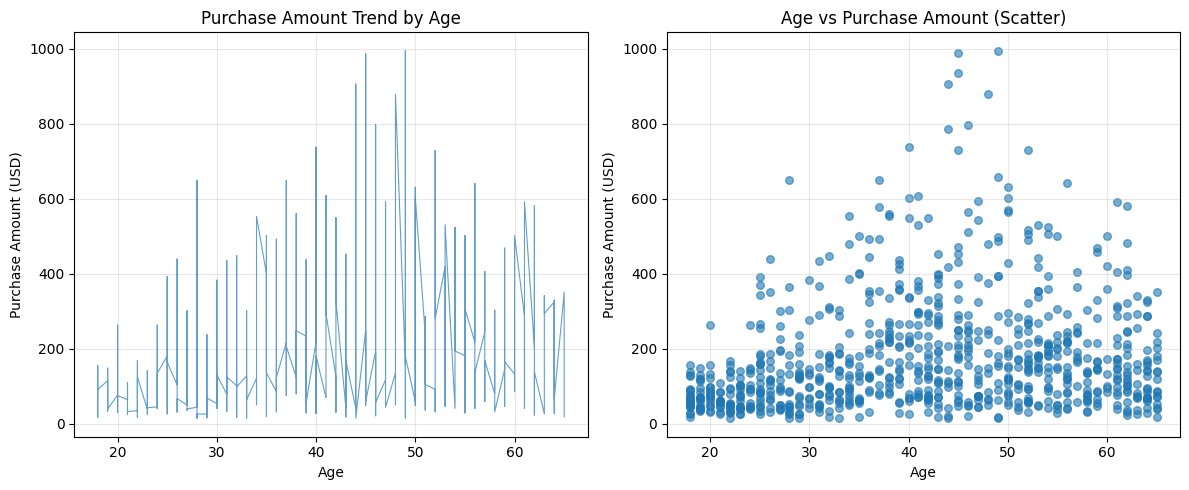

In [26]:
# Simple line graph - Age trend (sorted by age)
plt.figure(figsize=(12, 5))

# Subplot 1: Line graph
plt.subplot(1, 2, 1)
df_sorted = df.sort_values('Age')
plt.plot(df_sorted['Age'], df_sorted['Purchase Amount (USD)'], linewidth=0.8, alpha=0.7)
plt.title('Purchase Amount Trend by Age')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.grid(True, alpha=0.3)

# Subplot 2: Scatter plot
plt.subplot(1, 2, 2)
plt.scatter(df['Age'], df['Purchase Amount (USD)'], alpha=0.6, s=30)
plt.title('Age vs Purchase Amount (Scatter)')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

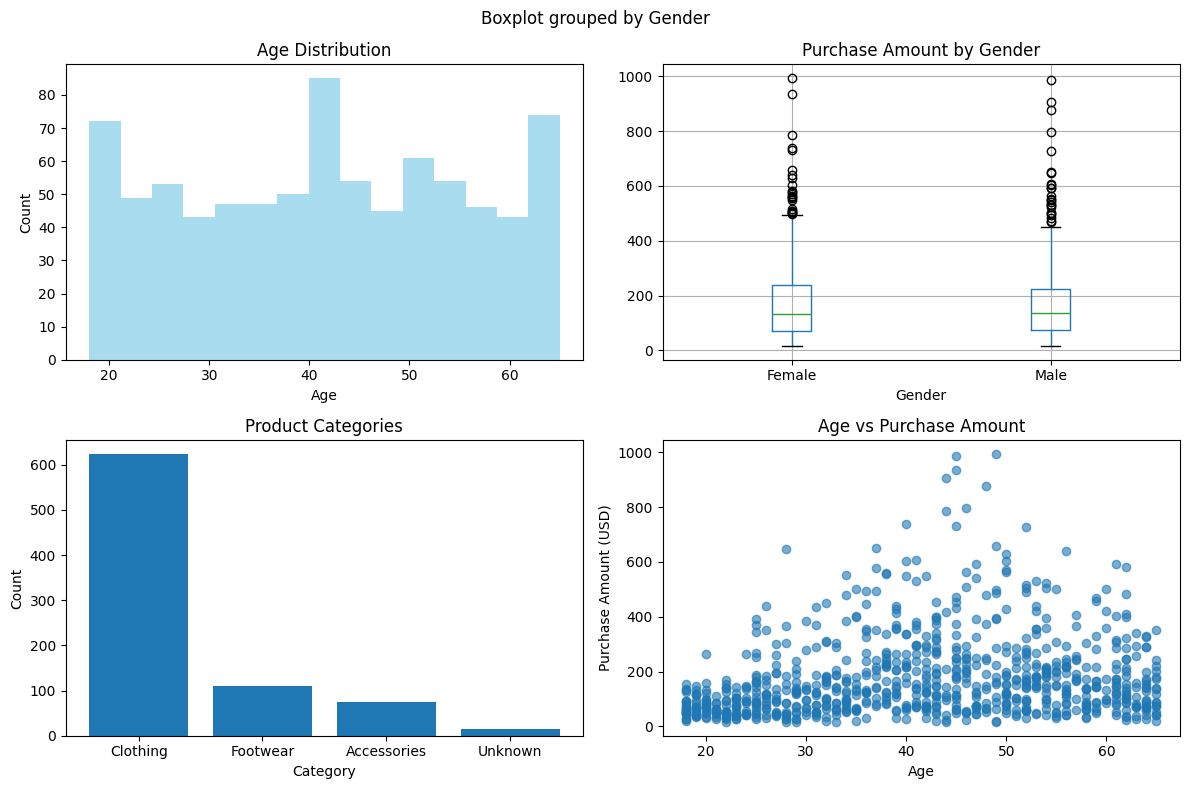

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set basic style
plt.style.use('default')

# Create simple plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Simple Data Visualizations', fontsize=14)

# 1. Age histogram
axes[0, 0].hist(df['Age'], bins=15, alpha=0.7, color='skyblue')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')

# 2. Purchase amount by gender
df.boxplot(column='Purchase Amount (USD)', by='Gender', ax=axes[0, 1])
axes[0, 1].set_title('Purchase Amount by Gender')

# 3. Category counts
category_counts = df['Category'].value_counts()
axes[1, 0].bar(category_counts.index, category_counts.values)
axes[1, 0].set_title('Product Categories')
axes[1, 0].set_xlabel('Category')
axes[1, 0].set_ylabel('Count')

# 4. Age vs Purchase Amount
axes[1, 1].scatter(df['Age'], df['Purchase Amount (USD)'], alpha=0.6)
axes[1, 1].set_title('Age vs Purchase Amount')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Purchase Amount (USD)')

plt.tight_layout()
plt.show()


In [28]:
# Some plots using plotly

import plotly.express as px
import plotly.graph_objects as go
# Histogram of Age
fig = px.histogram(df, x='Age', nbins=15, title='Age Distribution')
fig.show()

# Line plot of Purchase Amount over Age
fig = px.line(df.sort_values('Age'), x='Age', y='Purchase Amount (USD)', title='Purchase Amount Trend by Age')
fig.show()


In [29]:
# Distribution Shapes (skewness and kurtosis)

# https://www.datacamp.com/tutorial/understanding-skewness-and-kurtosis

# What is skewness and kurtosis?
# Skewness measures the asymmetry of the data distribution. A skewness value > 0 indicates a right-skewed distribution, while a value < 0 indicates a left-skewed distribution.
# Kurtosis measures the "tailedness" of the data distribution. A kurtosis value > 3 indicates a distribution with heavier tails than a normal distribution, while a value < 3 indicates lighter tails.  


skewness = df.select_dtypes(include=['float64', 'int64']).skew()
kurtosis = df.select_dtypes(include=['float64', 'int64']).kurtosis()

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")


Skewness: Age                     -0.045072
Annual Income (USD)      0.304392
Purchase Amount (USD)    1.910593
Review Rating           -0.888824
Previous Purchases      -0.138442
dtype: float64
Kurtosis: Age                     -1.153374
Annual Income (USD)     -0.228735
Purchase Amount (USD)    4.700692
Review Rating           -1.016266
Previous Purchases      -0.786226
dtype: float64


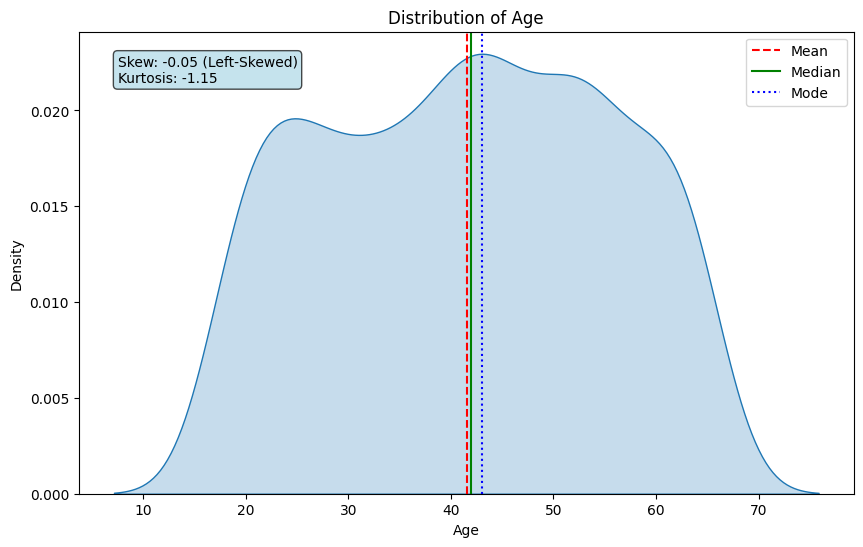

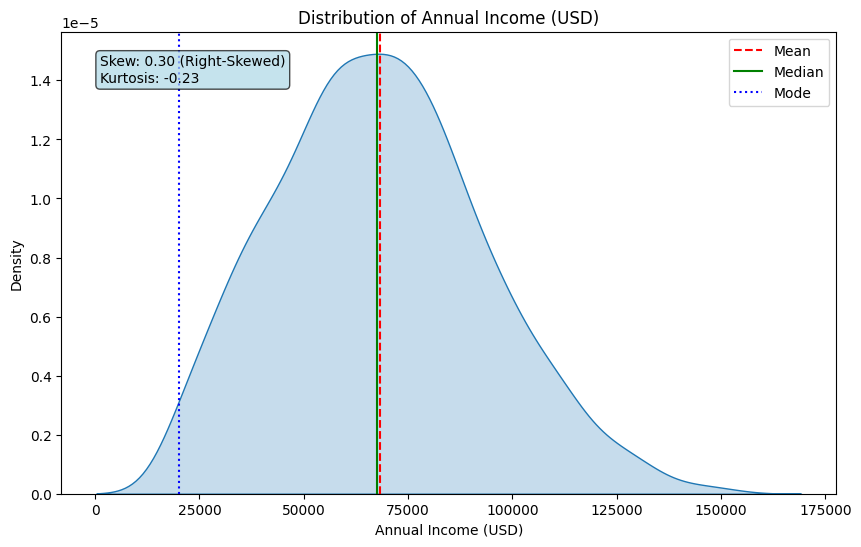

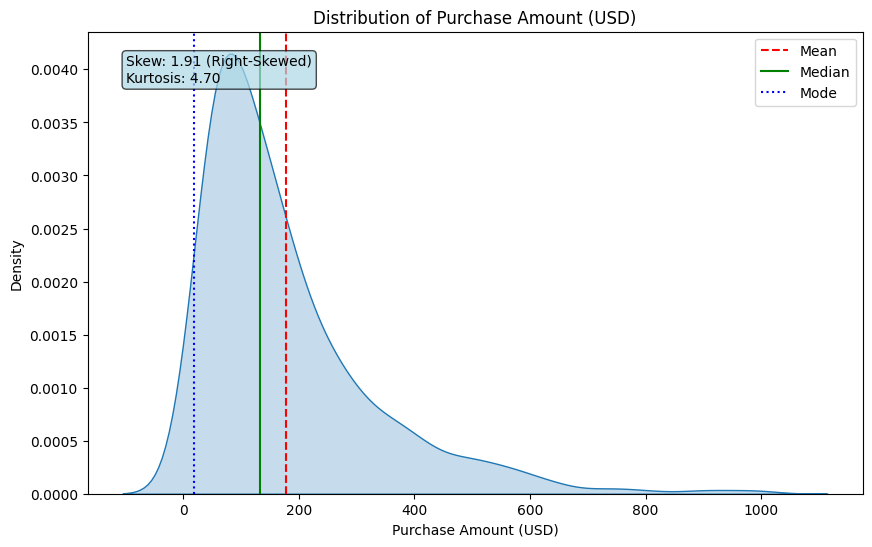

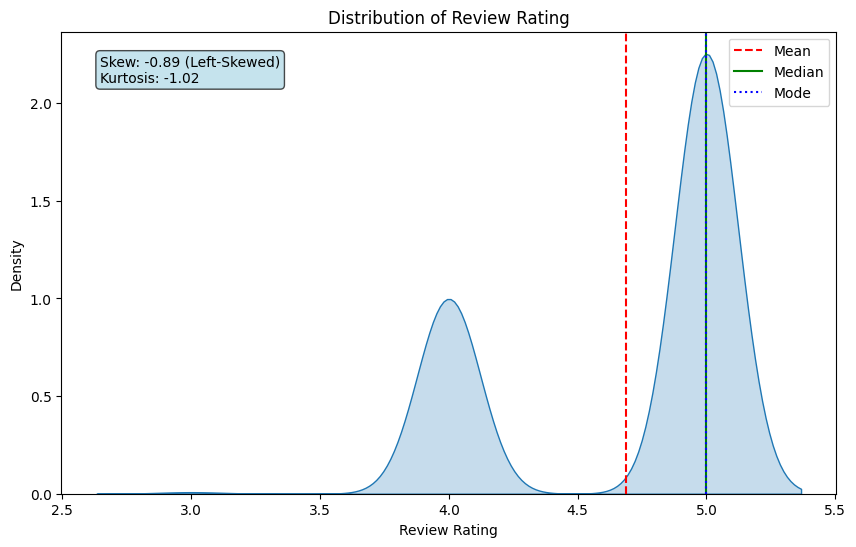

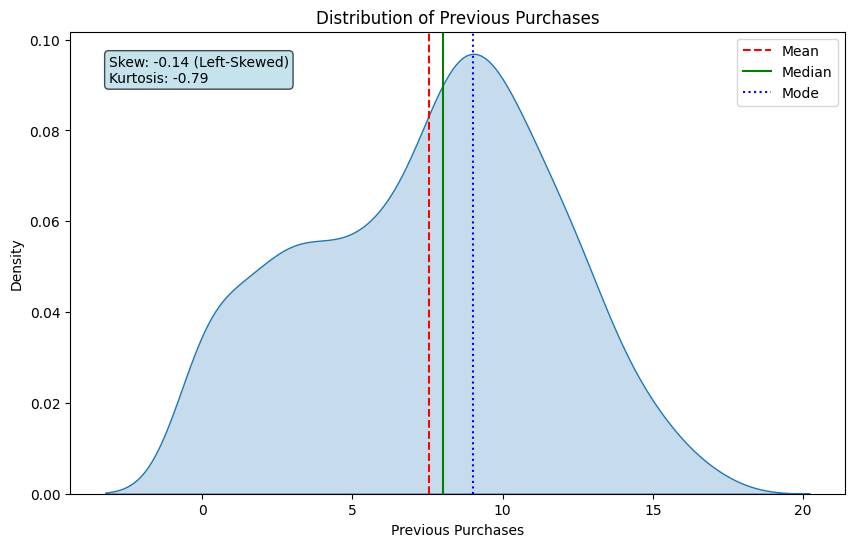

In [30]:
# Plot the kde plots to visualize the distribution with mean, median and mode markers
# Also mention the kind of distribution (normal, left-skewed, right-skewed, etc.)

import matplotlib.pyplot as plt
import seaborn as sns


for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df[col], fill=True)
    plt.axvline(mean_purchase[col], color='r', linestyle='--', label='Mean')
    plt.axvline(median_purchase[col], color='g', linestyle='-', label='Median')
    plt.axvline(mode_purchase[col], color='b', linestyle=':', label='Mode')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    if skewness[col] > 0:
        skew_type = "Right-Skewed"
    elif skewness[col] < 0:
        skew_type = "Left-Skewed"
    else:
        skew_type = "Symmetric"
    plt.text(0.05, 0.95, f'Skew: {skewness[col]:.2f} ({skew_type})\nKurtosis: {kurtosis[col]:.2f}', 
             transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue', alpha=0.7))

    # transform=plt.gca().transAxes to place text in axes coordinates
    # It works by transforming the coordinates of the text box from data coordinates to axes coordinates, allowing for consistent placement regardless of the data range.
    plt.legend()
    plt.show()


# Hypothesis Testing

## Hypothesis Testing

Hypothesis testing is a statistical method used to make inferences or draw conclusions about a population based on a sample of data. It involves formulating a null hypothesis (H₀) and an alternative hypothesis (H₁), collecting data, and using statistical tests to determine whether to reject or fail to reject the null hypothesis.

### Key Concepts

**Null Hypothesis (H₀):**
- A statement that there is no effect or no difference between groups or variables
- Serves as a starting point for statistical testing
- Typically assumed to be true until evidence suggests otherwise

**Alternative Hypothesis (H₁):**
- A statement that contradicts the null hypothesis
- Suggests that there is an effect or a difference between groups or variables
- Represents the research hypothesis that the researcher aims to support through data analysis

### Example Hypothesis Test

**Null Hypothesis (H₀):** The average purchase amount for customers with a subscription is equal to the average purchase amount for customers without a subscription.

**Alternative Hypothesis (H₁):** The average purchase amount for customers with a subscription is different from the average purchase amount for customers without a subscription.

### Statistical Significance
- **p-value**: Probability of observing the test results under the assumption that the null hypothesis is correct
- **Significance level (α)**: Threshold for determining statistical significance (commonly 0.05)
- **Decision rule**: If p-value < α, reject H₀; otherwise, fail to reject H₀

## T-Test Theory and Explanation

The **t-test** is a statistical hypothesis test used to determine if there is a significant difference between the means of two groups. It's one of the most commonly used statistical tests in data analysis and research.

### What is a T-Test?

A t-test compares the means of two groups to determine whether they are statistically different from each other. It uses the t-distribution, which is similar to the normal distribution but accounts for the uncertainty that comes with smaller sample sizes.

### Types of T-Tests

**1. One-Sample T-Test:**
- Compares a sample mean to a known population mean
- Example: Is the average age of our customers significantly different from 30 years?

**2. Independent Two-Sample T-Test (Unpaired):**
- Compares the means of two independent groups
- Example: Is there a difference in purchase amounts between subscribers and non-subscribers?

**3. Paired T-Test (Dependent):**
- Compares means from the same subjects at different times
- Example: Customer satisfaction before and after a service improvement

### Key Components of T-Test

**T-Statistic Formula:**
```
t = (mean₁ - mean₂) / (pooled standard error)
```

**Degrees of Freedom (df):**
- For independent t-test: df = n₁ + n₂ - 2
- Where n₁ and n₂ are the sample sizes of the two groups

**P-Value:**
- Probability of observing the test results under the null hypothesis
- If p-value < α (significance level), reject the null hypothesis

### Assumptions of T-Test

1. **Independence:** Observations must be independent of each other
2. **Normality:** Data should be approximately normally distributed
3. **Equal Variances:** Both groups should have similar variances (for independent t-test)
4. **Continuous Data:** The dependent variable should be continuous

### Interpretation

**Statistical Significance:**
- **p-value < 0.05:** Statistically significant difference (reject H₀)
- **p-value ≥ 0.05:** No statistically significant difference (fail to reject H₀)

**Effect Size:**
- A large t-statistic (positive or negative) indicates a larger difference between groups
- The magnitude tells us about practical significance, not just statistical significance

### Example from Our Analysis

In our customer dataset analysis:
- **Groups:** Customers with subscription vs. without subscription
- **Variable:** Purchase Amount (USD)
- **T-statistic:** 0.0019 (very small)
- **P-value:** 0.9985 (very high)
- **Conclusion:** No statistically significant difference in purchase amounts between the two groups

### When to Use T-Test vs Other Tests

**Use T-Test when:**
- Comparing means of continuous variables
- Sample size is relatively small (< 30) or population standard deviation is unknown
- Data meets the assumptions listed above

**Consider alternatives when:**
- Data is not normally distributed → Use Mann-Whitney U test
- Comparing more than two groups → Use ANOVA
- Large sample sizes → Z-test might be appropriate

In [31]:
# Hypothesis Testing Example

# Null Hypothesis (H0): There is no significant difference in average purchase amount between customers with and without a subscription.
# Alternative Hypothesis (H1): There is a significant difference in average purchase amount between customers with and without a subscription.

from scipy import stats
# Separate the data into two groups
group_with_subscription = df[df['Subscription Status'] == 'Yes']['Purchase Amount (USD)']
group_without_subscription = df[df['Subscription Status'] == 'No']['Purchase Amount (USD)']

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(group_with_subscription, group_without_subscription)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
    # This suggests that there could be a significant difference in average purchase amounts between the two groups.
else:
    print("Fail to reject the null hypothesis.")
    # This suggests that there is no significant difference in average purchase amounts between the two groups.


T-statistic: 0.9777345116378475, P-value: 0.3284936553794021
Fail to reject the null hypothesis.
